In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime
from unidecode import unidecode
import geopandas as gpd
from shapely import wkt
from scipy import stats
import os

In [2]:
df=gpd.read_parquet(r"C:\Users\Andres\Downloads\captaciones_final.parquet")

In [3]:
df=df.drop_duplicates(subset="IDCAPTACION")

In [4]:
data_modelo=df[["IDCAPTACION","OFERTA_HIDRICA_TOTAL","CAUDAL_ASIGNADO","TIPOUSO", "ESTADO_CAPTACION","LAT_DD_calc","LONG_DD_calc","ESTRUCTURA_GEOLOGICA",
                "UNIDAD GEOLOGICA","VALOR_NIVEL_ESTATICO","PROFUNDIDAD_MEDIA_RECIENTE_M"]]

In [5]:
data_modelo = data_modelo.dropna(subset=["ESTRUCTURA_GEOLOGICA", "UNIDAD GEOLOGICA"])

In [6]:
data_modelo.loc[:, "PROFUNDIDAD_MEDIA_RECIENTE_M"] = np.where(
    data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"].isna(),
    data_modelo["VALOR_NIVEL_ESTATICO"],
    data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"]
)

In [7]:
data_modelo.isnull().sum()

IDCAPTACION                       0
OFERTA_HIDRICA_TOTAL              0
CAUDAL_ASIGNADO                   0
TIPOUSO                           0
ESTADO_CAPTACION                  0
LAT_DD_calc                       0
LONG_DD_calc                      0
ESTRUCTURA_GEOLOGICA              0
UNIDAD GEOLOGICA                  0
VALOR_NIVEL_ESTATICO            668
PROFUNDIDAD_MEDIA_RECIENTE_M     68
dtype: int64

In [8]:
data_modelo.columns = data_modelo.columns.str.strip()

# 1️⃣ Imputar por UNIDAD_GEOLOGICA (media o mediana por unidad)
data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"] = data_modelo.groupby("UNIDAD GEOLOGICA")["PROFUNDIDAD_MEDIA_RECIENTE_M"].transform(
    lambda x: x.fillna(x.median())
)

# 2️⃣ Imputar por ESTRUCTURA_GEOLOGICA si aún hay nulos
data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"] = data_modelo.groupby("ESTRUCTURA_GEOLOGICA")["PROFUNDIDAD_MEDIA_RECIENTE_M"].transform(
    lambda x: x.fillna(x.median())
)

# 3️⃣ Imputar los pocos nulos restantes con la mediana global
data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"].fillna(
    data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"].median(),
    inplace=True
)

C:\Users\Andres\AppData\Local\Temp\ipykernel_13348\803589724.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_modelo["PROFUNDIDAD_MEDIA_RECIENTE_M"].fillna(


In [9]:
data_modelo.isnull().sum()

IDCAPTACION                       0
OFERTA_HIDRICA_TOTAL              0
CAUDAL_ASIGNADO                   0
TIPOUSO                           0
ESTADO_CAPTACION                  0
LAT_DD_calc                       0
LONG_DD_calc                      0
ESTRUCTURA_GEOLOGICA              0
UNIDAD GEOLOGICA                  0
VALOR_NIVEL_ESTATICO            668
PROFUNDIDAD_MEDIA_RECIENTE_M      0
dtype: int64

In [10]:
data_modelo.drop(columns=["VALOR_NIVEL_ESTATICO"],inplace=True)

In [11]:
data_modelo.isnull().sum()

IDCAPTACION                     0
OFERTA_HIDRICA_TOTAL            0
CAUDAL_ASIGNADO                 0
TIPOUSO                         0
ESTADO_CAPTACION                0
LAT_DD_calc                     0
LONG_DD_calc                    0
ESTRUCTURA_GEOLOGICA            0
UNIDAD GEOLOGICA                0
PROFUNDIDAD_MEDIA_RECIENTE_M    0
dtype: int64

In [12]:
data_modelo

,IDCAPTACION,OFERTA_HIDRICA_TOTAL,CAUDAL_ASIGNADO,TIPOUSO,ESTADO_CAPTACION,LAT_DD_calc,LONG_DD_calc,ESTRUCTURA_GEOLOGICA,UNIDAD GEOLOGICA,PROFUNDIDAD_MEDIA_RECIENTE_M
0,7027901,0.011803,1.500,Pecuario,Bueno,4.809722,-74.195556,Sinclinal de Rio Frio,Depósitos cuaternarios,35.4600
19,7030913,0.003500,0.034,Doméstico,Regular,4.746667,-74.232500,Planicie Bogotá-Funza-Mosquera,Grupo Guadalupe,75.8625
190,7031968,0.005940,2.700,Agricola,Regular,4.751389,-74.303056,Planicie Bogotá-Funza-Mosquera,Grupo Guadalupe,141.4960
266,7031969,0.013500,2.320,Agricola,Bueno,4.749722,-74.344167,Planicie Bogotá-Funza-Mosquera,Grupo Guadalupe,96.4460
437,7031974,0.000975,0.010,Doméstico,Bueno,4.749722,-74.201944,Planicie Bogotá-Funza-Mosquera,Depósitos cuaternarios,79.5100
...,...,...,...,...,...,...,...,...,...,...
67070,7038125,0.001700,0.050,Pecuario,Regular,4.780000,-74.167500,Sinclinal de Rio Frio,Grupo Guadalupe,58.8375
67089,7038126,0.003000,0.015,Doméstico,Regular,4.835000,-74.288611,Sinclinal de Subachoque,Depósitos cuaternarios,26.5200
67165,7038127,0.005000,0.015,Doméstico,Malo,4.831667,-74.287778,Sinclinal de Subachoque,Depósitos cuaternarios,26.5200
67241,7038128,0.003000,2.900,Agricola,Malo,4.858056,-74.218889,Sinclinal de Subachoque,Formación Bogotá,69.1620


In [13]:
data_modelo.isnull().sum()

IDCAPTACION                     0
OFERTA_HIDRICA_TOTAL            0
CAUDAL_ASIGNADO                 0
TIPOUSO                         0
ESTADO_CAPTACION                0
LAT_DD_calc                     0
LONG_DD_calc                    0
ESTRUCTURA_GEOLOGICA            0
UNIDAD GEOLOGICA                0
PROFUNDIDAD_MEDIA_RECIENTE_M    0
dtype: int64

In [14]:
data_modelo_categorica=gpd.read_parquet(r"C:\Users\Andres\Downloads\captaciones_final.parquet")

In [15]:
data_modelo_categorica=data_modelo_categorica[["IDCAPTACION","ESTADO_CAPTACION","TIPOUSO","ESTRUCTURA_GEOLOGICA","UNIDAD GEOLOGICA"]]

In [16]:
data_modelo_categorica = data_modelo_categorica.dropna(subset=["ESTRUCTURA_GEOLOGICA", "UNIDAD GEOLOGICA"])

In [17]:
# Identificar columnas únicas en cada dataset
cols_unicas_categoricas = [c for c in data_modelo_categorica.columns if c not in data_modelo.columns or c == "IDCAPTACION"]

# Unir solo las columnas necesarias
data_modelo_redes = data_modelo.merge(data_modelo_categorica[cols_unicas_categoricas], on="IDCAPTACION", how="left")

In [18]:
data_modelo_redes

,IDCAPTACION,OFERTA_HIDRICA_TOTAL,CAUDAL_ASIGNADO,TIPOUSO,ESTADO_CAPTACION,LAT_DD_calc,LONG_DD_calc,ESTRUCTURA_GEOLOGICA,UNIDAD GEOLOGICA,PROFUNDIDAD_MEDIA_RECIENTE_M
0,7027901,0.011803,1.50,Pecuario,Bueno,4.809722,-74.195556,Sinclinal de Rio Frio,Depósitos cuaternarios,35.460
1,7027901,0.011803,1.50,Pecuario,Bueno,4.809722,-74.195556,Sinclinal de Rio Frio,Depósitos cuaternarios,35.460
2,7027901,0.011803,1.50,Pecuario,Bueno,4.809722,-74.195556,Sinclinal de Rio Frio,Depósitos cuaternarios,35.460
3,7027901,0.011803,1.50,Pecuario,Bueno,4.809722,-74.195556,Sinclinal de Rio Frio,Depósitos cuaternarios,35.460
4,7027901,0.011803,1.50,Pecuario,Bueno,4.809722,-74.195556,Sinclinal de Rio Frio,Depósitos cuaternarios,35.460
...,...,...,...,...,...,...,...,...,...,...
67046,7038131,0.001210,0.02,Doméstico,Regular,4.844444,-74.257222,Sinclinal de Subachoque,Formación Bogotá,87.754
67047,7038131,0.001210,0.02,Doméstico,Regular,4.844444,-74.257222,Sinclinal de Subachoque,Formación Bogotá,87.754
67048,7038131,0.001210,0.02,Doméstico,Regular,4.844444,-74.257222,Sinclinal de Subachoque,Formación Bogotá,87.754
67049,7038131,0.001210,0.02,Doméstico,Regular,4.844444,-74.257222,Sinclinal de Subachoque,Formación Bogotá,87.754


In [19]:
data_modelo_redes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IDCAPTACION                   67051 non-null  int32  
 1   OFERTA_HIDRICA_TOTAL          67051 non-null  float64
 2   CAUDAL_ASIGNADO               67051 non-null  float64
 3   TIPOUSO                       67051 non-null  object 
 4   ESTADO_CAPTACION              67051 non-null  object 
 5   LAT_DD_calc                   67051 non-null  float64
 6   LONG_DD_calc                  67051 non-null  float64
 7   ESTRUCTURA_GEOLOGICA          67051 non-null  object 
 8   UNIDAD GEOLOGICA              67051 non-null  object 
 9   PROFUNDIDAD_MEDIA_RECIENTE_M  67051 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 4.9+ MB


In [20]:
from sklearn.preprocessing import MinMaxScaler
X = data_modelo_redes[[
    "OFERTA_HIDRICA_TOTAL", "CAUDAL_ASIGNADO", 
    "LAT_DD_calc", "LONG_DD_calc", "PROFUNDIDAD_MEDIA_RECIENTE_M",
    "TIPOUSO", "ESTADO_CAPTACION", "ESTRUCTURA_GEOLOGICA", "UNIDAD GEOLOGICA"
]]

In [21]:
# Codificación One-Hot para las categóricas
X = pd.get_dummies(X, columns=[
    "TIPOUSO", "ESTADO_CAPTACION", "ESTRUCTURA_GEOLOGICA", "UNIDAD GEOLOGICA"
])

In [22]:
# Normalización Min-Max
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_dim = X_scaled.shape[1]

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),       
    layers.Dense(16, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(input_dim, activation="linear")
])

autoencoder.compile(optimizer="adam", loss="mse")

history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=80,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Epoch 1/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0501 - val_loss: 0.0266
Epoch 2/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0110 - val_loss: 0.0198
Epoch 3/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0060 - val_loss: 0.0183
Epoch 4/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0042 - val_loss: 0.0195
Epoch 5/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0031 - val_loss: 0.0204
Epoch 6/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0026 - val_loss: 0.0219
Epoch 7/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023 - val_loss: 0.0224
Epoch 8/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0221
Epoch 9/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0225
Epoch 10/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018 - val_loss: 0.0220
Epoch 11/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017 - val_loss: 0.0215
Epoch 12/80
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [24]:


reconstruccion = autoencoder.predict(X_scaled)
mse = np.mean(np.square(X_scaled - reconstruccion), axis=1)

X["error_reconstruccion"] = mse


2096/2096 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step


In [25]:
X

,OFERTA_HIDRICA_TOTAL,CAUDAL_ASIGNADO,LAT_DD_calc,LONG_DD_calc,PROFUNDIDAD_MEDIA_RECIENTE_M,TIPOUSO_Agricola,TIPOUSO_Doméstico,TIPOUSO_Otro,TIPOUSO_Pecuario,ESTADO_CAPTACION_Bueno,...,ESTRUCTURA_GEOLOGICA_Sinclinal de Subachoque,ESTRUCTURA_GEOLOGICA_Sinclinal de Suesca-Teusaca,ESTRUCTURA_GEOLOGICA_Sinclinal del Sisga,UNIDAD GEOLOGICA_Depósitos cuaternarios,UNIDAD GEOLOGICA_Formación Bogotá,UNIDAD GEOLOGICA_Formación Cacho,UNIDAD GEOLOGICA_Formación Tilatá,UNIDAD GEOLOGICA_Grupo Guadalupe,UNIDAD GEOLOGICA_Sinclinal de Checua,error_reconstruccion
0,0.011803,1.50,4.809722,-74.195556,35.460,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,0.000283
1,0.011803,1.50,4.809722,-74.195556,35.460,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,0.000283
2,0.011803,1.50,4.809722,-74.195556,35.460,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,0.000283
3,0.011803,1.50,4.809722,-74.195556,35.460,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,0.000283
4,0.011803,1.50,4.809722,-74.195556,35.460,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,0.000283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67046,0.001210,0.02,4.844444,-74.257222,87.754,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,0.000297
67047,0.001210,0.02,4.844444,-74.257222,87.754,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,0.000297
67048,0.001210,0.02,4.844444,-74.257222,87.754,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,0.000297
67049,0.001210,0.02,4.844444,-74.257222,87.754,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,0.000297


In [26]:
umbral = np.percentile(mse, 95)
X["anomalia_autoencoder"] = (X["error_reconstruccion"] > umbral).astype(int)


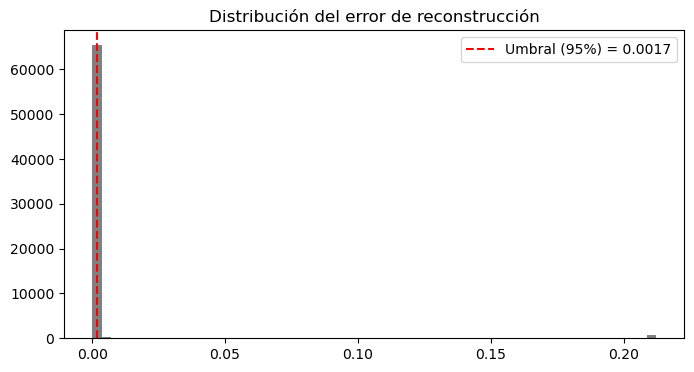

In [27]:
plt.figure(figsize=(8,4))
plt.hist(mse, bins=60, color="gray")
plt.axvline(umbral, color="red", linestyle="--", label=f"Umbral (95%) = {umbral:.4f}")
plt.title("Distribución del error de reconstrucción")
plt.legend()
plt.show()

In [28]:
X.anomalia_autoencoder.value_counts()

anomalia_autoencoder
0    63764
1     3287
Name: count, dtype: int64

In [29]:
Municipios_sabana = [
    "SOACHA", "SIBATE", "BOJACA", "MOSQUERA", "MADRID", "FACATATIVA", "FUNZA", "TENJO", "TABIO",
    "COTA", "SUBACHOQUE", "EL_ROSAL", "CAJICA", "CHIA", "ZIPAQUIRA", "NEMOCON", "COGUA", "LA_CALERA",
    "SOPO", "TOCANCIPA", "GACHANCIPA", "SESQUILE", "GUATAVITA", "CHOCONTA", "SUESCA", "VILLAPINZON"
]

In [30]:
cundinamarca=gpd.read_file(r"C:\Users\Andres\Downloads\Municipios_de_Cundinamarca_2022\Municipios_de_Cundinamarca_2022.shp")

In [31]:
cundinamarca.drop(columns=['OBJECTID','MpCodigo','MpArea', 'MpNorma', 'MpCategor','MpAltitud', 'Restriccio', 'Depto', 'Ley617'],inplace=True)

In [32]:
cundinamarca.rename(columns={"MpNombre":"MUNICIPIO"},inplace=True)

In [33]:
from unidecode import unidecode

cundinamarca["MUNICIPIO"] = (
    cundinamarca["MUNICIPIO"]
    .fillna("")
    .astype(str)
    .map(unidecode)         # quita tildes
    .str.upper()            # convierte a mayúsculas
    .str.replace(" ", "_")  # reemplaza espacios por _
)


In [34]:
sabana_bogota=cundinamarca[cundinamarca["MUNICIPIO"].isin(Municipios_sabana)]

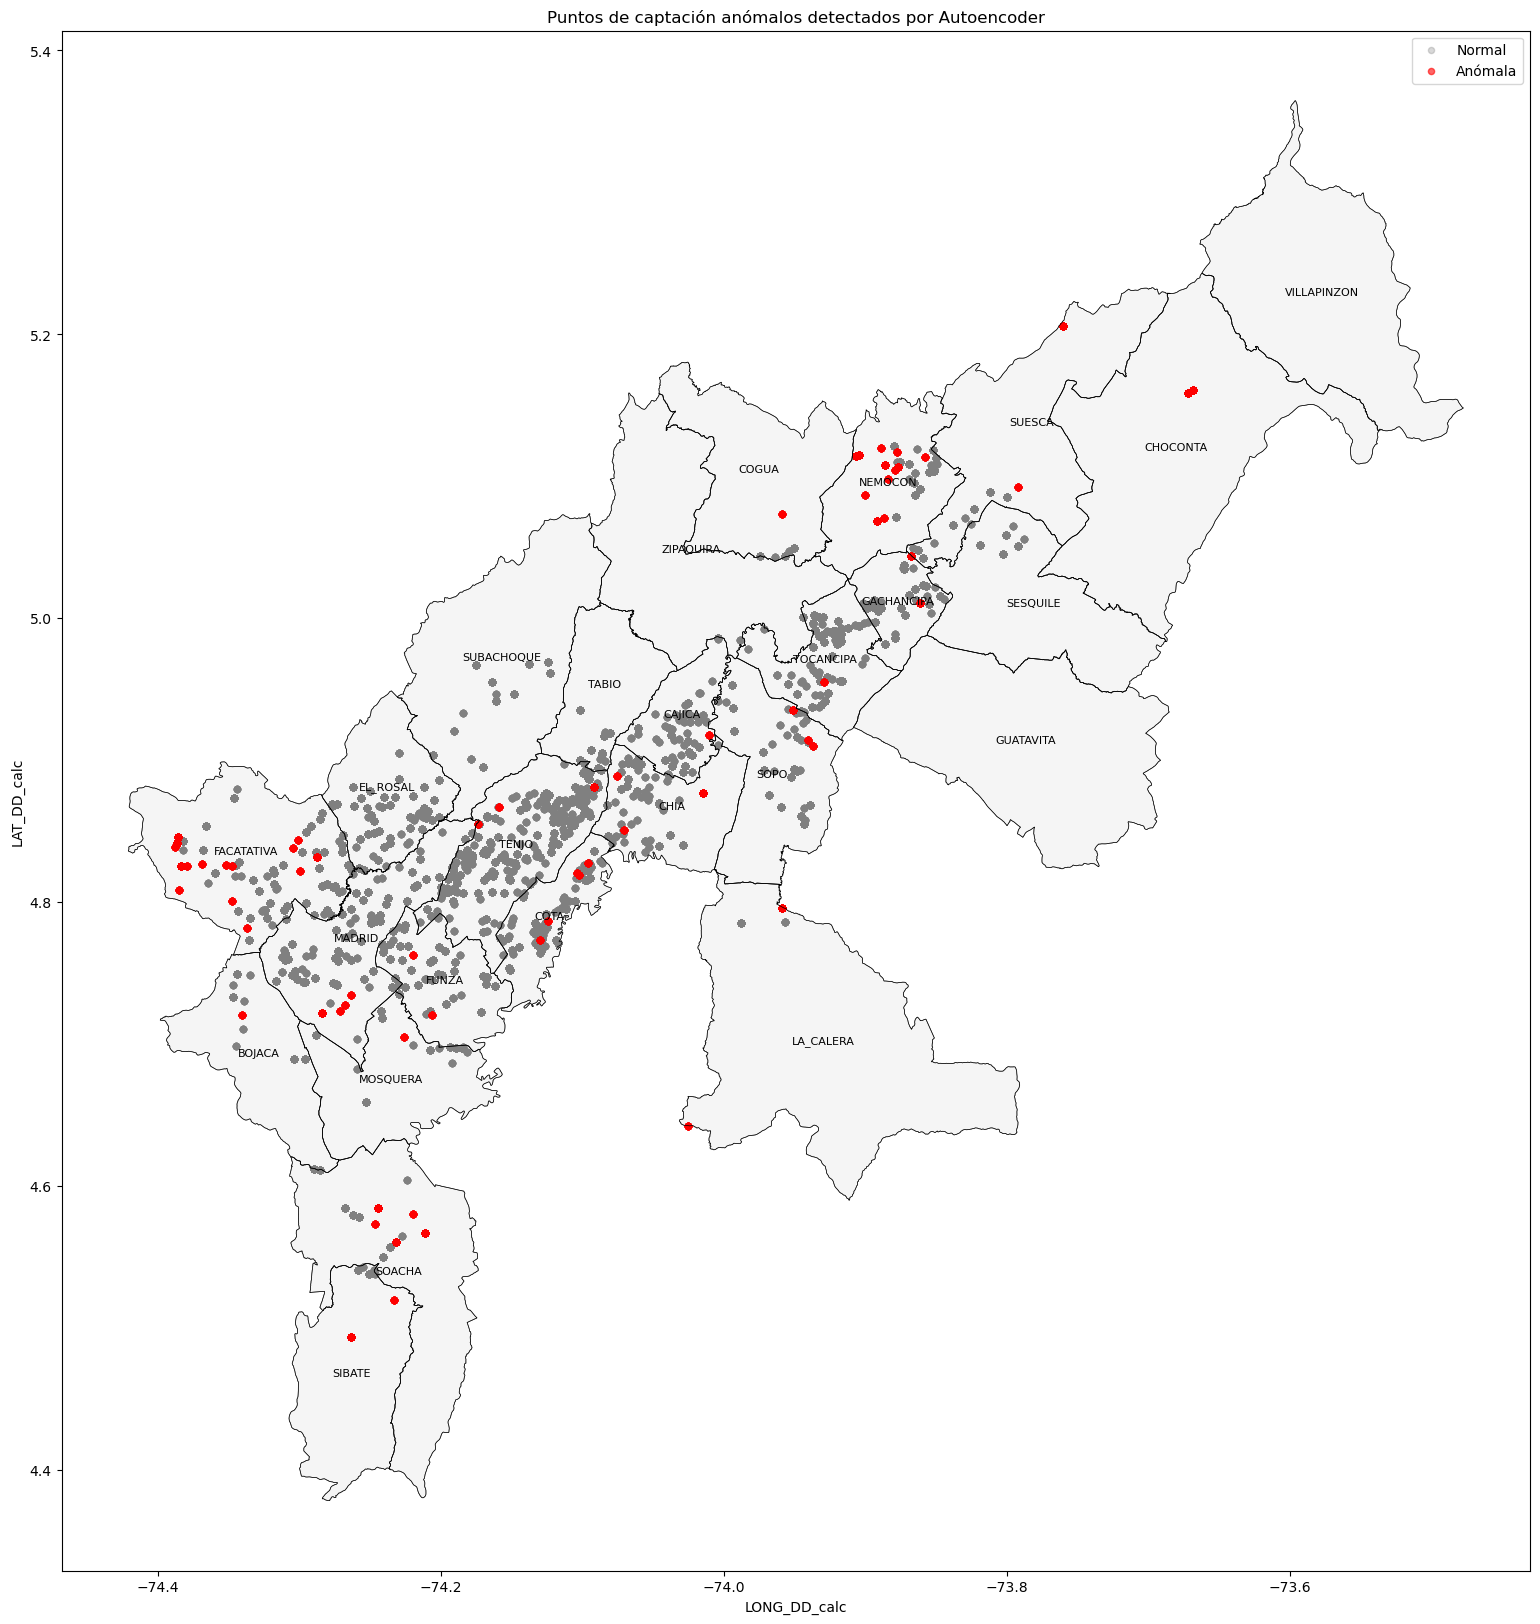

In [35]:
fig, ax = plt.subplots(figsize=(20,20))

# Capa base: municipios
sabana_bogota.boundary.plot(ax=ax, color="black", linewidth=0.5)
sabana_bogota.plot(ax=ax, color="whitesmoke", edgecolor="gray", linewidth=0.5)

# Normales
X[X["anomalia_autoencoder"] == 0].plot(
    ax=ax, x="LONG_DD_calc", y="LAT_DD_calc", kind="scatter", color="gray", alpha=0.3, label="Normal"
)

# Anómalas
X[X["anomalia_autoencoder"] == 1].plot(
    ax=ax, x="LONG_DD_calc", y="LAT_DD_calc", kind="scatter", color="red", alpha=0.6, label="Anómala"
)

# Etiquetas de municipios
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

plt.legend()
plt.title("Puntos de captación anómalos detectados por Autoencoder")
plt.show()

In [37]:
X.anomalia_autoencoder.value_counts()

anomalia_autoencoder
0    63764
1     3287
Name: count, dtype: int64